In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Bakery_Sales_Dataset.zip', compression='zip')

In [3]:
df.head()

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend


In [4]:
df.dtypes

TransactionNo     int64
Items            object
DateTime         object
Daypart          object
DayType          object
dtype: object

In [5]:
df.shape

(20507, 5)

In [6]:
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y-%m-%d %H:%M:%S')

In [7]:
df.dtypes

TransactionNo             int64
Items                    object
DateTime         datetime64[ns]
Daypart                  object
DayType                  object
dtype: object

In [8]:
df.head()

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend


In [9]:
df.isnull().sum()

TransactionNo    0
Items            0
DateTime         0
Daypart          0
DayType          0
dtype: int64

## The 20 best products

In [10]:
best_products = df["Items"].value_counts().head(20).reset_index()

In [11]:
best_products

,index,Items
0,Coffee,5471
1,Bread,3325
2,Tea,1435
3,Cake,1025
4,Pastry,856
5,Sandwich,771
6,Medialuna,616
7,Hot chocolate,590
8,Cookies,540
9,Brownie,379


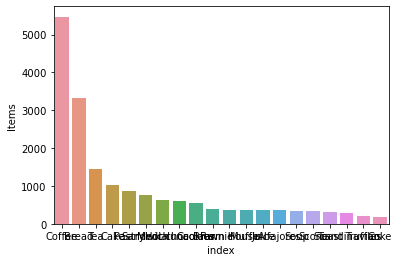

<Figure size 1440x648 with 0 Axes>

In [12]:
sns.barplot(data=best_products, x="index", y="Items")
plt.figure(figsize=(20,9))
plt.title = "20 best-selling products"
plt.xlabel = 'Products'
plt.ylabel = 'Count'

In [13]:
best_products.sum()

index    CoffeeBreadTeaCakePastrySandwichMedialunaHot c...
Items                                                18132
dtype: object

In [14]:
best_products['sum'] = best_products['Items'].sum()

In [15]:
best_products['Percentage_of_sales'] = (best_products['Items'] / best_products['sum'] * 100).round()

In [16]:
best_products

,index,Items,sum,Percentage_of_sales
0,Coffee,5471,18132,30.0
1,Bread,3325,18132,18.0
2,Tea,1435,18132,8.0
3,Cake,1025,18132,6.0
4,Pastry,856,18132,5.0
5,Sandwich,771,18132,4.0
6,Medialuna,616,18132,3.0
7,Hot chocolate,590,18132,3.0
8,Cookies,540,18132,3.0
9,Brownie,379,18132,2.0


In [17]:
plt.pie(best_products['Percentage_of_sales'],
        labels = best_products['index'],
        radius = 2,
        colors = colors,
        autopct='%.0f%%')
plt.show()

NameError: name 'colors' is not defined

## Sales by day parts and day types

In [20]:
daypart_sales = df.groupby('Daypart')['Items'].count().sort_values(ascending=False).reset_index()
daypart_sales

,Daypart,Items
0,Afternoon,11569
1,Morning,8404
2,Evening,520
3,Night,14


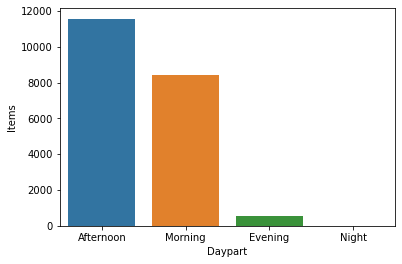

<Figure size 1440x648 with 0 Axes>

In [21]:
sns.barplot(data=daypart_sales, x="Daypart", y="Items")
plt.figure(figsize=(20,9))
plt.title = "Sales by day parts"
plt.xlabel = 'Day part'
plt.ylabel = 'Count'

In [22]:
daytype_sales = df.groupby('DayType')['Items'].count().sort_values(ascending=False).reset_index()
daytype_sales

,DayType,Items
0,Weekday,12807
1,Weekend,7700


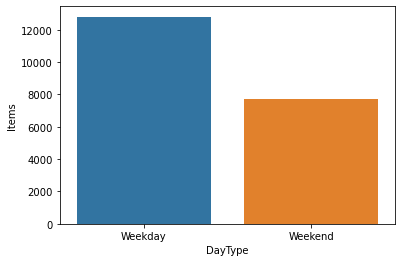

<Figure size 1440x648 with 0 Axes>

In [23]:
sns.barplot(data=daytype_sales, x="DayType", y="Items")
plt.figure(figsize=(20,9))
plt.title = "Sales by day days"
plt.xlabel = 'Day part'
plt.ylabel = 'Count'

## Sales by days

In [24]:
df["Week_Day"] = pd.to_datetime(df["DateTime"]).dt.weekday
df["Week_Day"] = df["Week_Day"] \
    .replace((0,1,2,3,4,5,6),
    ('Monday','Tuesday' ,'Wednesday' ,'Thursday','Friday' ,'Saturday' ,'Sunday'))

In [25]:
df.head()

,TransactionNo,Items,DateTime,Daypart,DayType,Week_Day
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend,Sunday
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,Sunday
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,Sunday
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend,Sunday
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend,Sunday


In [26]:
sales_by_days = df.groupby('Week_Day')['Items'].count().sort_values(ascending=False).reset_index()
sales_by_days

,Week_Day,Items
0,Saturday,3554
1,Friday,3266
2,Sunday,3118
3,Monday,3035
4,Tuesday,2645
5,Thursday,2601
6,Wednesday,2288


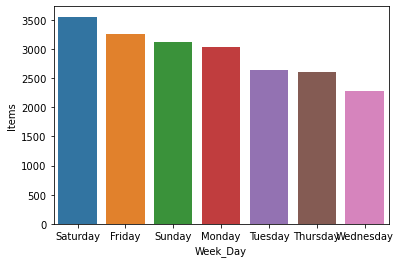

<Figure size 1440x648 with 0 Axes>

In [27]:
sns.barplot(data=sales_by_days, x="Week_Day", y="Items")
plt.figure(figsize=(20,9))
plt.title = "Sales by days"
plt.xlabel = 'Day'
plt.ylabel = 'Count'

## Сonclusions

#### Coffee is the best product and accounts for 30% of sales.
#### Most sales occur during the day.
#### Most sales occur on Saturdays.
